In [0]:
%matplotlib inline
import re
import enum
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import json
from pprint import pprint
import csv
from ast import literal_eval


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Parse classify bot json export to python array

In [0]:
classify_list = []
for line in open('/content/drive/My Drive/Colab Notebooks/classify_export.json', 'r'):
    classify_list.append(json.loads(line))
      
# pprint(classify_list)

Parse rekognition bot json export to python array

In [0]:
rekognition_list = []
for line in open('/content/drive/My Drive/Colab Notebooks/rekognition_export.json', 'r'):
    rekognition_list.append(json.loads(line))
    
# pprint(rekognition_list)

In [0]:
class Crimes(enum.Flag):
    NoCrime =             0b0000000001
    Assault =             0b0000000010
    Theft =             0b0000000100
    Gun =                 0b0000001000
    Drugs =             0b0000010000
    PropertyDamage =     0b0000100000
    Homicide =             0b0001000000
    Vehicular =            0b0010000000
    SexOffence =        0b0100000000
    Hostage =            0b1000000000

def getCrime(x):
    return [crime.name for crime in Crimes.__members__.values() if x & crime.value]
  
# print(getCrime(66))

Get the classification tags from the classfiy bot export and append it

In [0]:
merged_list = []
for image in rekognition_list:
  # check if it exists
  if any(d['id'] == image["image_id"] for d in classify_list):
    image_with_tags = {}
    image_with_tags = image
#     pprint(next(item for item in classify_list if item["id"] == image["image_id"]))
#     image_with_tags["tags"] = next(item for item in classify_list if item["id"] == image["image_id"])["tags"]
    image_with_tags["tags"] = getCrime(next(item for item in classify_list if item["id"] == image["image_id"])["tags"])
    merged_list.append(image_with_tags)

In [0]:
for i in range(100,101):
  pprint(merged_list[i])

{'_id': {'$oid': '5d622a1b10e96f309651ed65'},
 'image_id': 'e5d32847cb2e37a210319c197a8813fb2c127965f38018375250e84bed3e14bd.jpg',
 'lables_with_confidence': {'Apparel': 99.76117706298828,
                            'Boy': 57.48557662963867,
                            'Child': 76.3079833984375,
                            'Clothing': 99.76117706298828,
                            'Couch': 98.0612564086914,
                            'Cushion': 97.35753631591797,
                            'Face': 99.71694946289062,
                            'Female': 84.374267578125,
                            'Furniture': 98.0612564086914,
                            'Girl': 75.58572387695312,
                            'Home Decor': 58.619346618652344,
                            'Human': 99.71694946289062,
                            'Indoors': 58.51927185058594,
                            'Kid': 76.3079833984375,
                            'Pants': 82.31653594970703,
                     

In [0]:
cleaned = []
for image in merged_list:
  r = {}
  r["id"] = image["image_id"]
  r["tags"] = image["tags"]
  tag_list = [*image["lables_with_confidence"]]
  r["object_labels"] = ','.join(tag_list)
  
  cleaned.append(r)
print(cleaned)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
for i in range(1):
  pprint(cleaned[i])

{'id': 'ef560ef5493aa2e2a9d5dbfc363da0fc820be04c2d7166bc5842ae99958ec7e6.jpg',
 'object_labels': 'Medical Imaging X-Ray Film,Ct Scan,X-Ray',
 'tags': ['NoCrime']}


Write the list to a CSV file

In [0]:
cleaned_keys = cleaned[0].keys()
# print(cleaned_keys)
with open('/content/drive/My Drive/Colab Notebooks/cleaned.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, cleaned_keys)
    dict_writer.writeheader()
    dict_writer.writerows(cleaned)

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cleaned.csv')
df.tags = df.tags.apply(literal_eval)

df.head()

,id,tags,object_labels
0,f42884d282acb522a396c2402764196e29e1e903235b64...,[NoCrime],"Person,Human,Face,Hair,Clothing,Apparel,Female..."
1,e13857bad42bc7136d46d31eee7b203deae19c7dc51f09...,[NoCrime],"Bow,Human,Person,Cello,Musical Instrument,Art,..."
2,fb7ae430fbe7595a6631ba1a4ab44c3031cc4ef9385d54...,[NoCrime],"Furniture,Pet,Cat,Animal,Mammal,Couch,Blanket,..."
3,d852496f5363579213ba597a273bc94e6f33870d7c3807...,[NoCrime],"Human,Person,Face,Costume,Apparel,Clothing,Fem..."
4,d590e434f287f52f7871018d841d5c0a0b970e2b049e39...,[NoCrime],"Advertisement,Paper,Flyer,Poster,Brochure,Book"


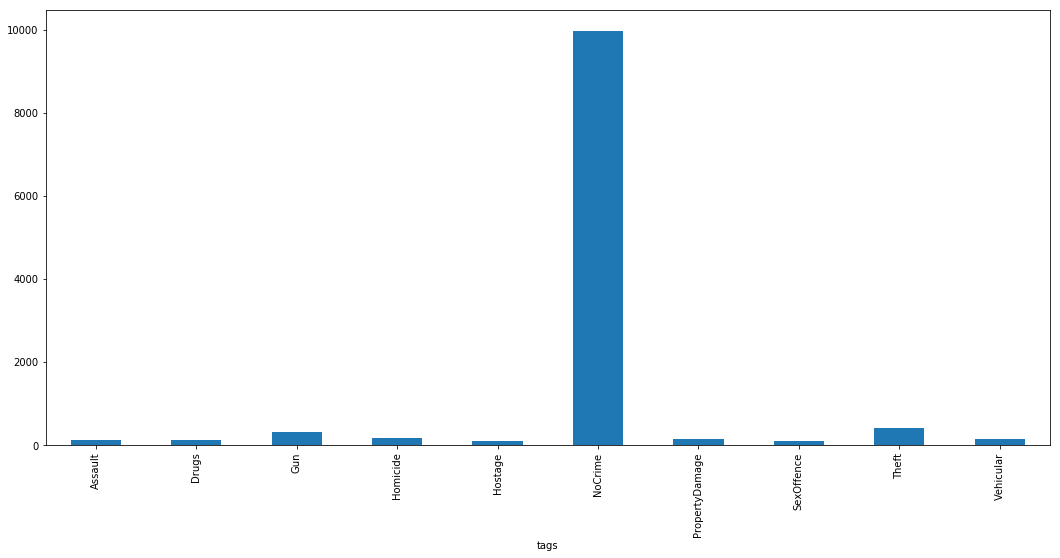

In [0]:

a = pd.Series([item for sublist in df.tags for item in sublist])
df_a = a.value_counts().sort_index().rename_axis('tags').reset_index(name='f')
# df_a.head()
df_a = df_a.set_index('tags')
# df_a.info()

plt.subplots(figsize=(18,8))
df_a['f'].plot.bar()

In [0]:
df_a.head()
# df.info()

,f
tags,
Assault,117
Drugs,120
Gun,325
Homicide,179
Hostage,104


In [0]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1))
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 1))
features =  tfidf.fit_transform(df.object_labels.values.astype('U')).toarray()
# features = tfidf.fit_transform(df.object_labels).toarray()
labels = df.tags
features.shape

(10760, 1866)

In [0]:
from io import StringIO

col = ['tags_string', 'object_labels']
df['tags_string'] = [','.join(map(str, l)) for l in df['tags']]

df = df[col]
df = df[pd.notnull(df['object_labels'])]
df.columns = ['tags_string', 'object_labels']
df['category_id'] = df['tags_string'].factorize()[0]
category_id_df = df[['tags_string', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'tags_string']].values)
df.head()



,tags_string,object_labels,category_id
0,NoCrime,"Person,Human,Face,Hair,Clothing,Apparel,Female...",0
1,NoCrime,"Bow,Human,Person,Cello,Musical Instrument,Art,...",0
2,NoCrime,"Furniture,Pet,Cat,Animal,Mammal,Couch,Blanket,...",0
3,NoCrime,"Human,Person,Face,Costume,Apparel,Clothing,Fem...",0
4,NoCrime,"Advertisement,Paper,Flyer,Poster,Brochure,Book",0


In [0]:
df.head()
print(category_to_id)

{'NoCrime': 0, 'PropertyDamage': 1, 'Gun': 2, 'Homicide': 3, 'Vehicular': 4, 'Theft,Gun': 5, 'Assault': 6, 'Hostage': 7, 'Theft': 8, 'Homicide,SexOffence': 9, 'Assault,Drugs': 10, 'NoCrime,Hostage': 11, 'SexOffence': 12, 'Homicide,Hostage': 13, 'Gun,Hostage': 14, 'Gun,Vehicular': 15, 'Gun,Vehicular,Hostage': 16, 'Assault,Gun': 17, 'Drugs': 18, '': 19, 'Theft,Vehicular': 20, 'Theft,Hostage': 21, 'PropertyDamage,Vehicular': 22, 'Assault,Theft,Gun': 23, 'Theft,Gun,Homicide': 24, 'Gun,PropertyDamage': 25, 'Theft,Gun,Hostage': 26, 'Assault,Vehicular,Hostage': 27, 'Assault,Theft': 28, 'Gun,Homicide': 29, 'Assault,Theft,Gun,Drugs,Hostage': 30, 'Assault,Theft,Gun,Hostage': 31, 'Theft,Drugs,PropertyDamage,Homicide,Vehicular': 32, 'Assault,Theft,Gun,Drugs,PropertyDamage,Homicide,Vehicular,SexOffence,Hostage': 33, 'Theft,Drugs,PropertyDamage,Homicide,SexOffence': 34, 'Vehicular,Hostage': 35, 'Theft,Gun,Drugs,PropertyDamage,Homicide,Vehicular,SexOffence': 36, 'Assault,Theft,Drugs,PropertyDamage,Ho

In [0]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2

for Tags, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Tags))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,Drugs':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,Gun':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,Gun,Hostage':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,Homicide':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,PropertyDamage,Vehicular':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,Theft':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,Theft,Drugs,Homicide,SexOffence':
  . Most correlated unigrams:
. final
. zoo
  . Most correlated bigrams:
. 
# 'Assault,Theft,Drugs,Homicide,Vehicular,SexOffence':
  . Most correlated unigrams:
. final
. zoo
  . Most corr

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['object_labels'], df['tags_string'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
print(clf.predict(count_vect.transform(["Human, Gum, Shop, Knife"])))

['NoCrime']


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

from sklearn.preprocessing import MultiLabelBinarizer
MultiLabelBinarizer().fit_transform(features)



for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

ValueError: ignored